In [3]:
class Empty(Exception):
    pass
class LinkedStack:
 #--- -Node class- ---
    class _Node:
        __slots__ = '_element', '_next' #faster memory access

        def __init__(self,element,next):
            self._element = element
            self._next = next

 #--- -Stack methods- ---
    def __init__(self): #empty stack
        self._head = None
        self._size = 0

    def __len__(self):
        return self._size

    def is_empty(self):
        return self._size == 0

    def push(self,e):
        self._head = self._Node(e,self._head)
        self._size += 1

    def top(self):
        if self.is_empty():
            raise Empty('Stack is empty!')
        return self._head._element

    def pop(self):
        if self.is_empty():
            raise Empty('Stack is empty!')
        answer = self._head._element
        self._head = self._head._next
        self._size -= 1
        return answer
    

In [9]:
import time
def stoper(n, liczba_pomiarow):
    push_time = []
    is_empty_time = []
    len_time = []
    top_time = []
    pop_time = []
    s = LinkedStack()
    for i in range(n):
        push_sum = 0
        is_empty_sum = 0
        len_sum = 0
        top_sum = 0
        pop_sum = 0
        for j in range(liczba_pomiarow):
            start_push = time.time()
            s.push(1)
            end_push = time.time()
            push_sum += end_push-start_push
            start_is_empty = time.time()
            b = s.is_empty()
            end_is_empty = time.time()
            is_empty_sum += end_is_empty-start_is_empty
            start_len = time.time()
            len(s)
            end_len = time.time()
            len_sum += end_len-start_len
            if not b:
                start_top = time.time()
                s.top()
                end_top = time.time()
                top_sum += end_top-start_top
                start_pop = time.time()
                s.pop()
                end_pop = time.time()
                pop_sum += end_pop-start_pop
                s.push(1)
        push_time.append((push_sum)/n)
        is_empty_time.append((is_empty_sum)/n)
        len_time.append((len_sum)/n)
        top_time.append((top_sum)/n)
        pop_time.append((pop_sum)/n)
    return push_time, is_empty_time, len_time, top_time, pop_time

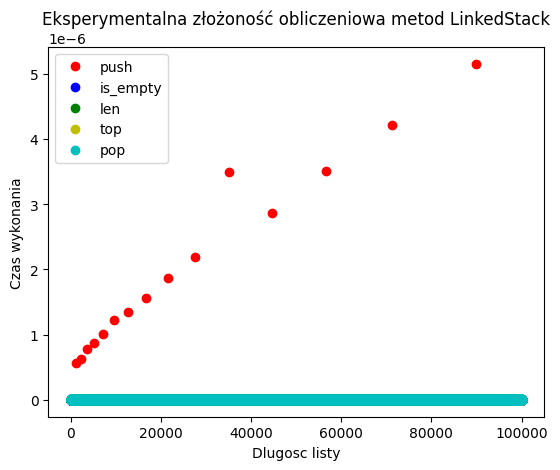

In [19]:
import matplotlib.pyplot as plt
xs = range(0, 100000)
push_time, is_empty_time, len_time, top_time, pop_time = stoper(100000, 100)
plt.plot(xs, push_time, "ro", label="push")
plt.plot(xs, is_empty_time, "bo", label="is_empty")
plt.plot(xs, len_time, "go", label = "len")
plt.plot(xs, top_time, "yo", label = "top")
plt.plot(xs, pop_time, "co", label = "pop")
plt.xlabel("Dlugosc listy")
plt.legend(loc="best")
plt.ylabel("Czas wykonania")
plt.title("Eksperymentalna złożoność obliczeniowa metod LinkedStack")
plt.show()